In [ ]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!pip install bertopic[visualization]

In [ ]:
import json
from bertopic import BERTopic
import numpy as np

from gensim.models import Word2Vec

Leer Tweets extraídos

In [ ]:
def extraer_cuentas_y_twets_usuarios_json(lista_cuentas, lista_tweets, diccionario_tweets):
    with open("tweets.json", 'r') as fp:
        diccionario_tweets = json.load(fp)
        for i in range(len(diccionario_tweets['data'].keys())):
            lista_cuentas.append(diccionario_tweets['includes'][str(i)])
            lista_tweets.append(diccionario_tweets['data'][str(i)]['text'])

        print('Cantidad: ',len(lista_cuentas))
        return len(diccionario_tweets['data'])

In [ ]:
with open("tweets.json") as fp:
    diccionario_tweets = json.load(fp)

In [ ]:
cuentas_usuarios = []
tweets = []
diccionario_tweets = {'data':{}, 'includes':{}}
extraer_cuentas_y_twets_usuarios_json(cuentas_usuarios, tweets, diccionario_tweets)

Cantidad:  9788


9788

In [ ]:
tweets[0]

'quiero llorar d lo mal q m siento'

In [ ]:
model = BERTopic(language='spanish', calculate_probabilities=True)
topics, probabilities = model.fit_transform(tweets)

In [ ]:
model.get_topic_freq().head()

,Topic,Count
0,-1,3404
1,0,519
2,1,355
3,2,304
4,3,300


In [ ]:
model.get_topic(0)

[('llorar', 0.046673870102460886),
 ('quiero', 0.027336483537351144),
 ('ganas', 0.019504829613649674),
 ('voy', 0.018193287432202217),
 ('me', 0.017025947507095268),
 ('no', 0.012476791893685332),
 ('tengo', 0.012194422416562739),
 ('mi', 0.01172789513537997),
 ('de', 0.011228191681780172),
 ('en', 0.010385529926284429)]

In [ ]:
model.save("my_model")

In [ ]:
model.visualize_topics()

In [ ]:
model.visualize_distribution(probabilities[0])

### **Segunda parte**
Leeré los comentarios clasificados, buscaré en qué tópico cayeron y trataré de indentificar los tópicos con más personas que tienen algún problema.

In [ ]:
nombre_archivo_clasificacion = "clasificacion.txt"

In [ ]:
contenido = list()
with open(nombre_archivo_clasificacion, 'r+') as archivo:
    contenido = archivo.readlines()

In [ ]:
contenido

['s\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 's\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 's\n',
 'n\n',
 'n\n',
 's\n',
 'n\n',
 'n\n',
 'n\n',
 's\n',
 'n\n',
 'n\n',
 's\n',
 'n\n',
 's\n',
 'n\n',
 'n\n',
 's\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 's\n',
 's\n',
 's\n',
 'n\n',
 's\n',
 'n\n',
 'n\n',
 's\n',
 'n\n',
 'n\n',
 's\n',
 's\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 's\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 's\n',
 's\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 's\n',
 's\n',
 's\n',
 'n\n',
 'n\n',
 'n\n',
 's\n',
 'n\n',
 'n\n',
 's\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 's\n',
 's\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 's\n',
 's\n',
 's\n',
 's\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 'n\n',
 's\n',
 '109']

In [ ]:
cont = int(contenido.pop())
problemas_mentales = list(map(lambda x : 1 if (x[0:1]) == 's' else 0, contenido))

In [ ]:
problemas_mentales = np.asarray(problemas_mentales)

In [ ]:
sum(problemas_mentales)

30

In [ ]:
topicos_documentos_clasificados = model.topics_[:cont]

In [ ]:
topicos_documentos_clasificados = np.asarray(topicos_documentos_clasificados)

In [ ]:
topicos_documentos_depresivos = topicos_documentos_clasificados[problemas_mentales == 1]

In [ ]:
len(topicos_documentos_depresivos)

30

In [ ]:
topicos_documentos_depresivos

array([ 0, 16, -1,  2, 29, -1, -1, -1, -1, 33, -1,  2,  0, -1, 65,  0, -1,
       -1, 10,  1, 50,  3, -1,  0, -1, 36,  0,  0, -1, 37])

In [ ]:
topicos_documentos_depresivos_limpio = [x for x in topicos_documentos_depresivos if x != -1]

<function matplotlib.pyplot.show(*args, **kw)>

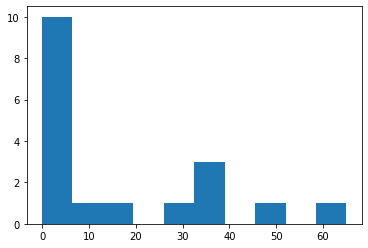

In [ ]:
import matplotlib.pyplot as plt

plt.hist(topicos_documentos_depresivos_limpio)
plt.show

In [ ]:
model.get_topic(1)

[('triste', 0.02152423897242132),
 ('eu', 0.01758165278355154),
 ('fico', 0.015760595339947357),
 ('me', 0.015315157354456935),
 ('estoy', 0.012195957492785172),
 ('minha', 0.011752896723657459),
 ('fiquei', 0.0112951989206497),
 ('tão', 0.011045739074621903),
 ('siento', 0.010947769569887373),
 ('estou', 0.010684769458091542)]

Ver el tamaño de los topicos

In [ ]:
model.topic_sizes_

{-1: 3404,
 0: 519,
 1: 355,
 2: 304,
 3: 300,
 4: 267,
 5: 264,
 6: 175,
 7: 164,
 8: 164,
 9: 151,
 10: 143,
 11: 132,
 12: 113,
 13: 111,
 14: 110,
 15: 106,
 16: 101,
 17: 92,
 18: 88,
 19: 83,
 20: 82,
 21: 81,
 22: 76,
 24: 72,
 25: 72,
 23: 72,
 26: 69,
 27: 63,
 28: 59,
 29: 57,
 30: 52,
 31: 51,
 32: 49,
 33: 48,
 34: 45,
 35: 42,
 36: 42,
 38: 41,
 37: 41,
 39: 40,
 40: 40,
 41: 39,
 42: 38,
 43: 37,
 44: 37,
 45: 36,
 46: 34,
 47: 34,
 48: 33,
 49: 33,
 50: 32,
 51: 31,
 53: 30,
 52: 30,
 54: 28,
 55: 27,
 56: 27,
 57: 26,
 58: 26,
 59: 25,
 60: 25,
 61: 25,
 62: 25,
 63: 25,
 64: 25,
 65: 25,
 68: 24,
 66: 24,
 67: 24,
 69: 22,
 70: 22,
 71: 22,
 72: 22,
 73: 21,
 74: 21,
 75: 20,
 76: 20,
 77: 20,
 78: 20,
 81: 19,
 80: 19,
 79: 19,
 83: 18,
 84: 18,
 85: 18,
 82: 18,
 86: 17,
 87: 16,
 88: 16,
 89: 16,
 90: 16,
 91: 15,
 92: 15,
 93: 15,
 95: 14,
 94: 14,
 96: 13,
 97: 13,
 98: 13,
 99: 13,
 100: 13,
 101: 12,
 102: 12,
 103: 11,
 104: 10,
 105: 10,
 106: 10}

Porcentaje de comentarios con transtorno por tópico

In [ ]:
from collections import Counter

counter = Counter(topicos_documentos_depresivos_limpio)

In [ ]:
counter

Counter({0: 6,
         16: 1,
         2: 2,
         29: 1,
         33: 1,
         65: 1,
         10: 1,
         1: 1,
         50: 1,
         3: 1,
         36: 1,
         37: 1})

In [ ]:
cantidad_documentos_por_topico = model.topic_sizes_

In [ ]:
topicos_con_transtorno = list(counter.keys())

In [ ]:
topicos_con_transtorno

[0, 16, 2, 29, 33, 65, 10, 1, 50, 3, 36, 37]

In [ ]:
for i in topicos_con_transtorno:
  print("{:<5} {:>5.2f}%".format(i, (counter[i] / cantidad_documentos_por_topico[i])*100))

0      1.16%
16     0.99%
2      0.66%
29     1.75%
33     2.08%
65     4.00%
10     0.70%
1      0.28%
50     3.12%
3      0.33%
36     2.38%
37     2.44%


In [ ]:
model.get_topic(102)

[('aaaaaaahhhhhhh', 0.15370265549544318),
 ('doc', 0.15370265549544318),
 ('demaciado', 0.15370265549544318),
 ('vacía', 0.14242949458165763),
 ('ivete', 0.13897034521719204),
 ('define', 0.13897034521719204),
 ('opiniones', 0.1303589188109401),
 ('tmb', 0.12425350316980385),
 ('credo', 0.12425350316980385),
 ('grata', 0.11565751126597021)]

In [ ]:
model.get_topic(6)

[('nerviosa', 0.026782184663766067),
 ('ansiosa', 0.02578553851735095),
 ('preocupada', 0.023500358612916942),
 ('ansioso', 0.023391122347320235),
 ('nervioso', 0.018091547053959177),
 ('preocupado', 0.01733821186748393),
 ('já', 0.014490262341133469),
 ('tô', 0.013723151941313114),
 ('estou', 0.010103994930017969),
 ('eu', 0.009886529559213757)]

## **Ahora voy a crear otro modelo con palabras y cosas básicas corregidas**

In [ ]:
import pandas as pd

df = pd.read_csv("processed_tweets.csv")
df.head()

,Unnamed: 0,Comentarios
0,0,quiero llorar d lo mal q m siento
1,1,hyukjae dijo que no pudo dormir por estar preo...
2,2,@EFjvelezb @petrogustavo Ahora dilo sin llorar.
3,3,@FournierChanta5 @St_Martineau @radiopirate Tr...
4,4,estoy triste. suena party favors automáticamen...


In [ ]:
model2 = BERTopic(language='spanish', calculate_probabilities=True)
topics2, probabilities2 = model2.fit_transform(df['Comentarios'])

In [ ]:
model2.get_topic_freq().head()

,Topic,Count
0,-1,3794
1,0,595
2,1,493
3,2,315
4,3,219


In [ ]:
model2.save("my_model_2")

In [ ]:
model2.visualize_topics()

In [ ]:
model2.visualize_distribution(probabilities2[0])

In [ ]:
model2.reduce_topics(df['Comentarios'], nr_topics=60)

In [ ]:
model2.visualize_topics()

## **Ahora voy a crear otro modelo con preprocesamiento total**

In [ ]:
df2 = pd.read_csv("totally_processed_tweets.csv")
df2.head()

,Unnamed: 0,Comentarios,TweetPre
0,0,quiero llorar d lo mal q m siento,quiero llorar siento
1,1,hyukjae dijo que no pudo dormir por estar preo...,hyukjae dijo pudo dormir preocupado paso seman...
2,2,@EFjvelezb @petrogustavo Ahora dilo sin llorar.,efjvelezb petrogustavo ahora dilo llorar
3,3,@FournierChanta5 @St_Martineau @radiopirate Tr...,fournierchanta martineau radiopirate triste ma...
4,4,estoy triste. suena party favors automáticamen...,triste suena party favor automaticamente


In [60]:
df2['TweetPre'].isnull().sum()

1

In [63]:
model3 = BERTopic(language='spanish', calculate_probabilities=True)
topics3, probabilities3 = model3.fit_transform(list(df2[df2['TweetPre'].notnull()]['TweetPre']))

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   9788 non-null   int64 
 1   Comentarios  9788 non-null   object
 2   TweetPre     9787 non-null   object
dtypes: int64(1), object(2)
memory usage: 229.5+ KB


In [64]:
model3.get_topic_freq().head()

,Topic,Count
0,-1,3894
1,0,307
2,1,202
3,2,153
4,3,141


In [65]:
model3.save("my_model_3")

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



In [66]:
model3.visualize_topics()

In [67]:
model3.visualize_distribution(probabilities3[0])

In [69]:
model3.reduce_topics(list(df2[df2['TweetPre'].notnull()]['TweetPre']), nr_topics=20)

In [71]:
model3.visualize_topics()

## **Ahora voy a implementar lo realizado en los papers**
Voy a usar los embedings de BERTopic y los embedings normales.

In [ ]:
len(probabilities)

9788

In [ ]:
datos = df['Comentarios']

In [ ]:
w2v_model = Word2Vec(min_count=40, window=1, vector_size=26, sample=6e-5, alpha=0.03, min_alpha=0.0007)
w2v_model.build_vocab(datos, progress_per=10000)
w2v_model.train(datos, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(1495967, 26419740)

### Ahora si puedo combinar los vectores y pasarlos a un algoritmo de ML

En el paper árabe dicen que los unen, usando FeatureUnion

In [ ]:
from sklearn.pipeline import FeatureUnion

In [74]:
union = FeatureUnion([("Word2Vec",  Word2Vec(min_count=40, window=1, vector_size=26, sample=6e-5, alpha=0.03, min_alpha=0.0007)),
                       ("BERTopic", BERTopic(language='spanish', calculate_probabilities=True))])

TypeError: ignored

In [ ]:
[]  []

In [ ]:
[]